# Aggregation Data

What we really want is a visualization that uses one number (a summary statistic like the mean)
to summarize the data for each region.

In [1]:
import pandas as pd

In [2]:
happiness2015=pd.read_csv('happiness2015.csv')

In [3]:
happiness2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Now we Want to find Mean happiness score Grouped by Region name 


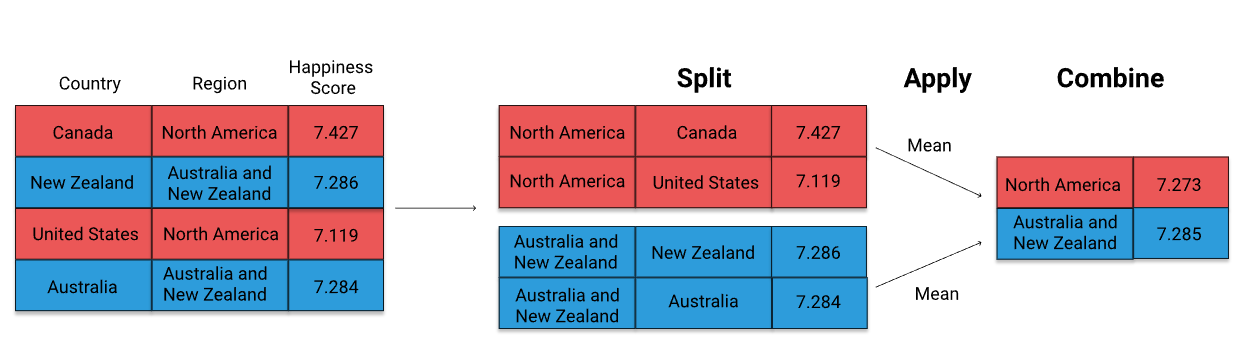

## First with for loop function
  1-Identify each unique value of  column region from the data set.
  
  2-Use a for loop to iterate over the unique region values assign it to region_group variable
  
  3-Use the Series.mean() method to calculate the mean happiness score for region_group.
  
  4-Create an dictionary named mean_happiness to store the results
  
  5- set the each row in region_group as key and mean as the value

In [19]:
regions=happiness2015['Region'].unique()
regions

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [7]:
for r in regions:
    region_group=happiness2015[happiness2015['Region']==r]

In [23]:
region_mean=region_group['Happiness Score'].mean()
region_mean

4.580857142857143

In [24]:
mean_happiness={}
mean_happiness[r]=region_mean

## Using Built-in function in Pandas "Groupby"
  1- create a GroupBy object using groupby method
  
  2- select data for a certain group using get_group() method 
  
  3- groups attribute to return dict with key:group set and value of index for each row in original data

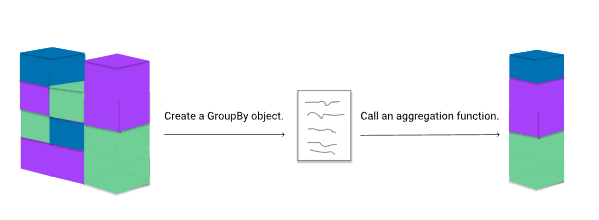

In [31]:
grouped=happiness2015.groupby('Region')
aus_nz=grouped.get_group('Australia and New Zealand')

In [ ]:
# To see Dictionary fo all regions
grouped.groups
# Example for output 'North America': Int64Index([4, 14], dtype='int64'

In [36]:
# compare that the out put of dict the same in original dataframe
north_america = happiness2015.iloc[[4,14]]

In [37]:
na_group = grouped.get_group('North America')

In [40]:
## to Comapre data returned from above 2 cells
equal = north_america == na_group


### Common Aggregation Function with Group by

   In order to aggregate our data, we must call a function on the GroupBy object
   
   mean()	Calculates the mean of groups.
   
   sum()	Calculates the sum of group values.
   
   size()	Calculates the size of the groups.
   
   count()	Calculates the count of values in groups.
   
   min()	Calculates the minimum of group values.
   
   max()	Calculates the maximum of group values.
    

In [42]:
# Example 
group_means=grouped.mean()
group_means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [44]:
## you can aggregate one particular column in the original DataFrame
## by select specific columns for a GroupBy object the same way you would for a DataFrame
happy_grouped=grouped['Happiness Score']
happy_mean=happy_grouped.mean()


####    agg([func1 ,func2,func3])   method can

1-perform both aggregations at once.

2-compute custom aggregations

In [59]:
import numpy as np

In [60]:
# the mean and maximum happiness scores for each region
happy_grouped = grouped['Happiness Score']
happy_mean_max=happy_grouped.agg([np.mean,np.max])


In [61]:
def dif(group):
    return (group.max() - group.mean())
mean_max_dif=happy_grouped.agg(dif)

In [64]:
# way to write in one line 
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)
# where being region as index and happines score as values

### DataFrame.pivot_table() method :
method can perform the same kinds of aggregations as groupby and make the code for complex aggregations easier to read.

take three Parameters (values,index,aggfunc) the mean is the default aggregation function of df.pivot_table().

In [66]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [76]:
#Margins = Ture to compute the mean of All 
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region' ,margins=True)

<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Region'>

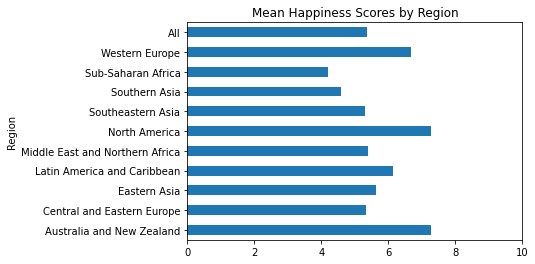

In [79]:
# visualize  mean happiness scores by each region
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False )

In [73]:
world_mean_happiness=happiness2015['Happiness Score'].mean()

#### Group more than Column aggregate with more than function by Region column using "Group by method"

In [ ]:
grouped_byGroup=happiness2015.groupby('Region')
grouped=grouped_byGroup['Happiness Score','Family']
happy_family_stats=grouped.agg([np.min,np.max,np.mean])


#### Group more than Column aggregate with more than function by Region column using "Pivot table"

In [84]:
pv_happy_family_stats=happiness2015.pivot_table(['Happiness Score','Family'],'Region',
                                                aggfunc=[np.min,np.max,np.mean],margins=True)